In [1]:
# Change working directory
import os

os.chdir('Desktop/FDM/AIA/dataset')

print("Current working directory: {0}".format(os.getcwd()))



Current working directory: /Users/xuanyixiao/Desktop/FDM/AIA/dataset


In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

import pandas as pd 

# Read training data 
data = pd.read_csv("adult.data", header=None) 

data.head()



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# Assign columns
data.columns = ['age','work_class','fnlwgt','edu','edu_num','mari_stat','job',
               'relationship','race','sex','capi_gain','capi_loss','week_hrs','nat_ctry',
               'income']

In [4]:
print(data.head(5))

   age         work_class  fnlwgt         edu  edu_num            mari_stat  \
0   39          State-gov   77516   Bachelors       13        Never-married   
1   50   Self-emp-not-inc   83311   Bachelors       13   Married-civ-spouse   
2   38            Private  215646     HS-grad        9             Divorced   
3   53            Private  234721        11th        7   Married-civ-spouse   
4   28            Private  338409   Bachelors       13   Married-civ-spouse   

                  job    relationship    race      sex  capi_gain  capi_loss  \
0        Adm-clerical   Not-in-family   White     Male       2174          0   
1     Exec-managerial         Husband   White     Male          0          0   
2   Handlers-cleaners   Not-in-family   White     Male          0          0   
3   Handlers-cleaners         Husband   Black     Male          0          0   
4      Prof-specialty            Wife   Black   Female          0          0   

   week_hrs        nat_ctry  income  
0     

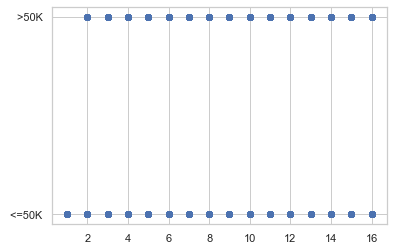

In [5]:
# Graph income vs years of education
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array(data.edu_num)
ypoints = np.array(data.income)

plt.plot(xpoints, ypoints,'o')
plt.show()

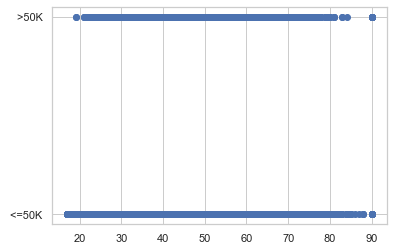

In [6]:
# Graph income vs age
xpoints = np.array(data.age)
ypoints = np.array(data.income)

plt.plot(xpoints, ypoints, 'o')
plt.show()

{' White', ' Other', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Black'}
[' White', ' Other', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Black']
{' White': 'red', ' Other': 'yellow', ' Asian-Pac-Islander': 'blue', ' Amer-Indian-Eskimo': 'orange', ' Black': 'black'}


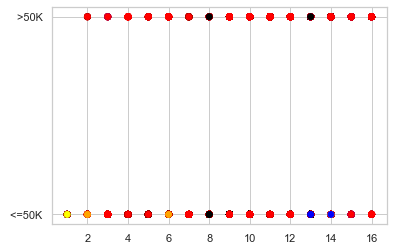

In [7]:
# Graph income vs (edu_num & race)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig, ax = plt.subplots()

myset = set(data.race)
print(myset)

race_list = list(myset)
print(race_list)
colors = ['red','yellow','blue','orange','black']
colors_assign = dict(zip(race_list, colors))
print(colors_assign)

ax.scatter(data.edu_num,data.income, c=data.race.map(colors_assign))

plt.show()


In [8]:
# Show overall income distribution
data['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

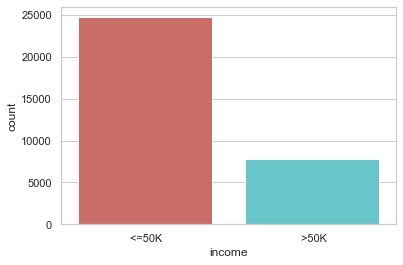

<Figure size 432x288 with 0 Axes>

In [9]:
sns.countplot(x= data.income,data=data,palette='hls')
plt.show()
plt.savefig('count_plot')

In [10]:
# Show overall income distribution in %

count_below_50k = len(data[data['income']==' <=50K'])

count_above_50k = len(data[data['income']==' >50K'])

count_below_50k = count_below_50k/len(data['income'])
print("percentage of income below 50k is", round(count_below_50k*100,1), "%")

count_above_50k = count_above_50k/len(data['income'])
print("percentage of income above 50k is", round(count_above_50k*100,1), "%")

percentage of income below 50k is 75.9 %
percentage of income above 50k is 24.1 %


In [11]:
# Binarize income
from sklearn.preprocessing import LabelBinarizer

df1 = data.copy()
  
label_binarizer = LabelBinarizer()
  
label_binarizer_output = label_binarizer.fit_transform( df1['income'])

result_df = pd.DataFrame(label_binarizer_output, columns = ['income_above_50k'])


In [12]:
# Add the new income column
data = pd.concat((data,result_df),axis = 1)
data.tail(5)

,age,work_class,fnlwgt,edu,edu_num,mari_stat,job,relationship,race,sex,capi_gain,capi_loss,week_hrs,nat_ctry,income,income_above_50k
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K,1


In [13]:
# Binarize sex
df1 = data.copy()
  
label_binarizer = LabelBinarizer()
  
label_binarizer_output = label_binarizer.fit_transform( df1['sex'])

label_binarizer.classes_
result_df = pd.DataFrame(label_binarizer_output, columns = ['male'])


In [14]:
# Add the new sex column
data = pd.concat((data,result_df),axis = 1)
data.head(5)

,age,work_class,fnlwgt,edu,edu_num,mari_stat,job,relationship,race,sex,capi_gain,capi_loss,week_hrs,nat_ctry,income,income_above_50k,male
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,0


In [15]:
# Binarize race-- White: 1, All others: 0
df1 = data.copy()
  
label_binarizer = LabelBinarizer()
  
label_binarizer_output = label_binarizer.fit_transform( df1['race'])

result_df = pd.DataFrame(label_binarizer_output, columns = label_binarizer.classes_)
  

In [16]:
# Add the new race column
data = pd.concat((data,result_df),axis = 1)
data.tail(5)

,age,work_class,fnlwgt,edu,edu_num,mari_stat,job,relationship,race,sex,...,week_hrs,nat_ctry,income,income_above_50k,male,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,...,38,United-States,<=50K,0,0,0,0,0,0,1
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,...,40,United-States,>50K,1,1,0,0,0,0,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,...,40,United-States,<=50K,0,0,0,0,0,0,1
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,...,20,United-States,<=50K,0,1,0,0,0,0,1
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,...,40,United-States,>50K,1,0,0,0,0,0,1


In [17]:
# Drop columns not in later use

data2=data.drop(['income','edu','work_class','mari_stat','relationship','nat_ctry','sex'], axis=1)

In [18]:
data3= data2.drop(['race',' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black',' Other','fnlwgt'], axis=1)
data3.head()

,age,edu_num,job,capi_gain,capi_loss,week_hrs,income_above_50k,male,White
0,39,13,Adm-clerical,2174,0,40,0,1,1
1,50,13,Exec-managerial,0,0,13,0,1,1
2,38,9,Handlers-cleaners,0,0,40,0,1,1
3,53,7,Handlers-cleaners,0,0,40,0,1,0
4,28,13,Prof-specialty,0,0,40,0,0,0


In [19]:
# Explore features group by income 

data3.groupby('income_above_50k').mean()

,age,edu_num,capi_gain,capi_loss,week_hrs,male,White
income_above_50k,,,,,,,
0,36.783738,9.595065,148.752468,53.142921,38.840210,0.611974,0.837338
1,44.249841,11.611657,4006.142456,195.001530,45.473026,0.849637,0.907665


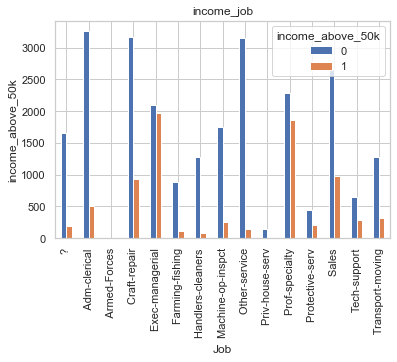

In [20]:
# Show income distribution group by occupation

%matplotlib inline
pd.crosstab(data.job,data.income_above_50k).plot(kind='bar')
plt.title('income_job')
plt.xlabel('Job')
plt.ylabel('income_above_50k')
plt.savefig('income_job')

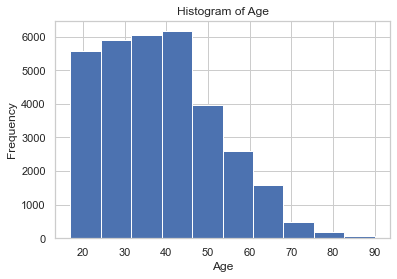

In [21]:
# Show age distribution of the sample
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

In [22]:
# Drop job column
data4= data3.drop(['job'], axis = 1)

In [23]:
# Assign X, y for training
X = data4.loc[:, data4.columns != 'income_above_50k']
y = data4.loc[:, data4.columns == 'income_above_50k']

In [24]:
# Run logistic regression
import statsmodels.api as sm
logit_model=sm.Logit(y,X.astype(float))
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.517168
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.063     
Dependent Variable: income_above_50k AIC:              33693.0387
Date:               2021-11-07 14:44 BIC:              33751.7748
No. Observations:   32561            Log-Likelihood:   -16840.   
Df Model:           6                LL-Null:          -17974.   
Df Residuals:       32554            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
age          -0.0063    0.0009   -7.0016  0.0000  -0.0081  -0.0046
edu_num      -0.0154    0.0043   -3.5515  0.0004  -0.0238  -0.

In [25]:
# Read test data 
data_test = pd.read_csv("adult.test", header=None, skiprows=1) 

data_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [26]:
# Prepare test data for prediction

data_test.columns = ['age','work_class','fnlwgt','edu','edu_num','mari_stat','job',
               'relationship','race','sex','capi_gain','capi_loss','week_hrs','nat_ctry',
               'income']

In [27]:
data_test.head()

,age,work_class,fnlwgt,edu,edu_num,mari_stat,job,relationship,race,sex,capi_gain,capi_loss,week_hrs,nat_ctry,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [28]:
from sklearn.preprocessing import LabelBinarizer

df1 = data_test.copy()
  
label_binarizer = LabelBinarizer()
  
label_binarizer_output = label_binarizer.fit_transform( df1['income'])

result_df = pd.DataFrame(label_binarizer_output, columns = ['income_above_50k'])

data_test= pd.concat((data_test,result_df),axis = 1)
data_test.head(5)

df1 = data_test.copy()
  
label_binarizer = LabelBinarizer()
  
label_binarizer_output = label_binarizer.fit_transform( df1['sex'])

result_df = pd.DataFrame(label_binarizer_output, columns = ['male'])


data_test= pd.concat((data_test,result_df),axis = 1)
data_test.head(5)

df1 = data_test.copy()
  
label_binarizer = LabelBinarizer()
  
label_binarizer_output = label_binarizer.fit_transform( df1['race'])

result_df = pd.DataFrame(label_binarizer_output, columns = label_binarizer.classes_)
  

data_test= pd.concat((data_test,result_df),axis = 1)
data_test.tail(5)

data_test2=data_test.drop(['income','edu','work_class','mari_stat','relationship','nat_ctry','sex'], axis=1)

data_test3= data_test2.drop(['race',' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black',' Other','fnlwgt',
                            'job'], axis=1)
data_test3.tail()

,age,edu_num,capi_gain,capi_loss,week_hrs,income_above_50k,male,White
16276,39,13,0,0,36,0,0,1
16277,64,9,0,0,40,0,1,0
16278,38,13,0,0,50,0,1,1
16279,44,13,5455,0,40,0,1,0
16280,35,13,0,0,60,1,1,1


In [29]:
# Assign X_test, y_test for prediction and accuracy checking
X_test = data_test3.loc[:, data_test3.columns != 'income_above_50k']
y_test = data_test3.loc[:, data_test3.columns == 'income_above_50k']

In [30]:
# Logistic Regression Model Fitting
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X, y)

/Users/xuanyixiao/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/xuanyixiao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
# Predict y and check accuracy
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


In [32]:
# Accuracy of logistic regression: 78%

In [33]:
# Decision Tree
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

In [34]:
features = ['age','edu_num','capi_gain','capi_loss','week_hrs','male',' White']

In [35]:
# Fit decision tree to training data
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

In [36]:
#   Graph the decision tree
# data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
# graph = pydotplus.graph_from_dot_data(data)
# graph.write_png('mydecisiontree.png')

# img=pltimg.imread('mydecisiontree.png')
# imgplot = plt.imshow(img)
# plt.show() 

In [37]:
# Print prediction result
print(dtree.predict(X_test))

[0 0 0 ... 1 0 0]


In [38]:
# Check accuracy
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(dtree.score(X_test, y_test)))

Accuracy of decision tree classifier on test set: 0.82


In [39]:
# Accuracy of decision tree: 82%

In [40]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

# Random forest model fit
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(X, y)

<ipython-input-40-c20f3ff6d842>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X, y)


RandomForestClassifier(n_estimators=50)

In [41]:
# Predict by random forest
y2_pred = classifier.predict(X_test)

In [42]:
# Check accuracy
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result2 = round(accuracy_score(y_test,y2_pred),2)
print("Accuracy of random forest:",result2)

Accuracy of random forest: 0.83


In [43]:
# Accuracy of random forest: 83%

In [44]:
# XGBoost
from xgboost import XGBRegressor
regressor  = XGBRegressor()

In [45]:
# XGBoost model fit 
regressor.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [46]:
# Predict by XGBoost
y3_pred = regressor.predict(X_test).reshape(16281,1)

In [47]:
# Check accuracy
def rmsle(y3_pred,y_test) :
    error = np.square(np.log10(y3_pred +1) - np.log10(y_test +1)).mean() ** 0.5
    Acc = 1 - error
    return Acc

print("Accuracy of XGBoost: ", round(rmsle(y3_pred,y_test),2))

Accuracy of XGBoost:  income_above_50k    0.9
dtype: float64


In [48]:
# Accuracy of XGBoost: 90%

In [49]:
# In conclusion, XGBoost generates the highest prediction accuracy.